In [1]:
import pandas as pd

In [5]:
df = pd.read_csv('/Users/luciaplacidi/Documents/fleetcor/Cross_Sell_View.csv')

In [6]:
df.head()

,VANTAGE_SCORE,PORTFOLIO,DEPOSIT_FLAG,LOCK_TYPE,LOCK_REASON,LOCK_CODE,CREDIT_LIMIT,LOCK_DAYS,DUE_DAYS,TERM_DAYS,...,BAL_31_60,BAL_1_30,TOT_NET_REV,NET_FEE_REV,NONFUEL_NET_REV,FUEL_NET_REV,SEGMENT,DAYS_PAST_DUE,CURRENT_BALANCE,UNBILLED_BALANCED
0,NaN,FMMC,NaN,PERM LOCK,BAD AGENCY,I,9500,5,15,30,...,0.0,0.0,90.20,83.0,0,7.20,29,0.0,340.16,204.36
1,NaN,BPMC,NaN,PERM LOCK,BAD AGENCY,I,12000,18,18,30,...,0.0,0.0,88.34,85.0,0,3.34,14,0.0,232.66,130.37
2,614.0,FMMC,1.0,PERM LOCK,BAD AGENCY,I,6500,7,15,30,...,0.0,0.0,269.14,225.0,0,44.14,43,0.0,3101.15,638.50
3,626.0,FMMC,NaN,PERM LOCK,BAD AGENCY,I,4000,10,7,30,...,0.0,0.0,45.03,50.0,0,-4.97,37,105.0,0.00,0.00
4,619.0,BPMC,NaN,PERM LOCK,INACTIVE,Q,3500,3,14,30,...,0.0,0.0,176.28,168.0,0,8.28,54,NaN,0.00,0.00


In [7]:
eligibility_criteria_summary = df[['VANTAGE_SCORE', 'DEPOSIT_FLAG', 'CREDIT_LIMIT', 'DAYS_PAST_DUE']].describe()

# Summarize performance metrics
performance_metrics_summary = df[['TOT_NET_REV', 'NET_FEE_REV', 'NONFUEL_NET_REV', 'FUEL_NET_REV', 'CURRENT_BALANCE', 'UNBILLED_BALANCED']].describe()

eligibility_criteria_summary, performance_metrics_summary

(       VANTAGE_SCORE  DEPOSIT_FLAG  CREDIT_LIMIT  DAYS_PAST_DUE
 count   12147.000000   6992.000000  20000.000000   17378.000000
 mean      629.930600      0.676201   9500.526150      26.121475
 std        57.970754      0.467958   8589.921692      43.915691
 min       419.000000      0.000000      0.000000       0.000000
 25%       607.000000      0.000000   3500.000000       0.000000
 50%       630.000000      1.000000   7500.000000       0.000000
 75%       665.000000      1.000000  12000.000000      44.000000
 max       790.000000      1.000000  75000.000000     333.000000,
         TOT_NET_REV   NET_FEE_REV  NONFUEL_NET_REV  FUEL_NET_REV  \
 count  20000.000000  20000.000000          20000.0  20000.000000   
 mean     379.326860    335.597678              0.0     43.729269   
 std      735.642985    711.559285              0.0     90.656002   
 min        0.040000    -26.000000              0.0    -71.240000   
 25%       50.000000     27.950000              0.0      1.530000   


In [6]:
correlation_matrix = df[['VANTAGE_SCORE', 'DEPOSIT_FLAG', 'CREDIT_LIMIT', 'DAYS_PAST_DUE', 'TOT_NET_REV', 'NET_FEE_REV', 'FUEL_NET_REV']].corr()

correlation_matrix

,VANTAGE_SCORE,DEPOSIT_FLAG,CREDIT_LIMIT,DAYS_PAST_DUE,TOT_NET_REV,NET_FEE_REV,FUEL_NET_REV
VANTAGE_SCORE,1.000000,-0.226572,0.133364,-0.028340,0.096457,0.085413,0.093755
DEPOSIT_FLAG,-0.226572,1.000000,0.052507,0.029691,-0.089242,-0.097737,0.050415
CREDIT_LIMIT,0.133364,0.052507,1.000000,0.025475,0.216686,0.200045,0.188186
DAYS_PAST_DUE,-0.028340,0.029691,0.025475,1.000000,0.074481,0.078774,-0.018408
TOT_NET_REV,0.096457,-0.089242,0.216686,0.074481,1.000000,0.992704,0.322928
NET_FEE_REV,0.085413,-0.097737,0.200045,0.078774,0.992704,1.000000,0.206453
FUEL_NET_REV,0.093755,0.050415,0.188186,-0.018408,0.322928,0.206453,1.000000


In [9]:
# Deliverable 3 - Sensitivity Analysis
# Define thresholds
credit_limit_threshold = df['CREDIT_LIMIT'].quantile(0.75)  # Using the 75th percentile as a proxy for opt-ins
days_past_due_threshold = 30  # Define "bad" as customers with payments over 30 days past due

# Flag customers based on assumed opt-in status and bad payment behavior
df['assumed_opt_in'] = df['CREDIT_LIMIT'] > credit_limit_threshold
df['bad_payment'] = df['DAYS_PAST_DUE'] > days_past_due_threshold

# Calculate bad rate for both groups
bad_rate_opt_in = df[df['assumed_opt_in']]['bad_payment'].mean()
bad_rate_non_opt_in = df[~df['assumed_opt_in']]['bad_payment'].mean()

bad_rate_opt_in, bad_rate_non_opt_in

(0.24210954998981876, 0.24594075154085757)

In [18]:
# Deliverable 4 - Spend-loss difference between different parent accounts
universal_card = df[df['FUEL_ONLY_PARENT_ACCT'] == '0']

In [15]:
fuel_only = df[df['FUEL_ONLY_PARENT_ACCT'] == 'FUEL-ONLY PARENT ACCT']

In [19]:
universal_card.shape

(18763, 44)

In [17]:
fuel_only.shape

(1217, 44)

In [30]:
universal_card_difference = universal_card[['TOT_NET_REV', 'WO_AMOUNT', 'DAYS_PAST_DUE', 'TOT_SPEND', 'NONFUEL_SPEND', 'FUEL_SPEND']].describe()
universal_card_difference

,TOT_NET_REV,WO_AMOUNT,DAYS_PAST_DUE,TOT_SPEND,NONFUEL_SPEND,FUEL_SPEND
count,18763.000000,18763.000000,16456.000000,18763.000000,18763.000000,18763.000000
mean,376.320596,9565.480026,26.561315,4007.743685,2758.675157,1249.068528
std,740.089225,10164.700184,44.496417,5539.018330,5016.988561,2361.687659
min,0.040000,9.790000,0.000000,0.990000,-200.000000,0.000000
25%,50.000000,1806.360000,0.000000,603.820000,0.000000,126.640000
50%,130.060000,7951.060000,0.000000,1986.450000,574.620000,423.180000
75%,338.160000,12573.310000,46.000000,5281.120000,4001.500000,1337.295000
max,7953.340000,81730.350000,333.000000,84431.450000,74305.940000,83898.250000


In [31]:
fuel_only_difference = fuel_only[['TOT_NET_REV', 'WO_AMOUNT', 'DAYS_PAST_DUE', 'TOT_SPEND', 'NONFUEL_SPEND', 'FUEL_SPEND']].describe()
fuel_only_difference

,TOT_NET_REV,WO_AMOUNT,DAYS_PAST_DUE,TOT_SPEND,NONFUEL_SPEND,FUEL_SPEND
count,1217.000000,1217.000000,911.000000,1217.000000,1217.000000,1217.000000
mean,426.001611,2015.306812,18.221734,3281.314552,10.424610,3270.889942
std,667.187015,1792.445073,30.810752,2740.891750,18.374689,2742.468678
min,3.780000,591.410000,0.000000,87.670000,0.000000,87.670000
25%,11.790000,1437.040000,0.000000,1637.160000,0.000000,1637.160000
50%,134.170000,1437.040000,0.000000,2899.500000,0.000000,2874.510000
75%,401.390000,1794.750000,19.000000,4824.680000,22.000000,4773.990000
max,3498.830000,9771.690000,109.000000,20206.190000,65.000000,20206.190000


In [32]:
# Deliverable 6 - Re-evaluate Eligibility Variables

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np

In [91]:
# Regression Analysis
predictors = ['VANTAGE_SCORE', 'CREDIT_LIMIT', 'NSF_PMTS', 'DAYS_PAST_DUE', 'PAYDEX', 'LOCK_DAYS', 'DUE_DAYS', 'TERM_DAYS', 'CLI_AMOUNT', 'TOT_SPEND', 'NONFUEL_SPEND', 'FUEL_SPEND', 'NSF_AMT', 'NO_OF_PAYMENT', 'PAYMENT_AMOUNT', 'BAL_1_30', 'BAL_31_60', 'BAL_61_90', 'BAL_90_PLUS', 'SEGMENT', 'CURRENT_BALANCE', 'UNBILLED_BALANCED']
target = 'TOT_NET_REV'

In [92]:
data = df.dropna(subset=predictors + [target])
X = data[predictors]
y = data[target]

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [94]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [95]:
y_pred = lr_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [96]:
coefficients = pd.Series(lr_model.coef_, index=predictors)

rmse, coefficients

(556.6726448526834,
 VANTAGE_SCORE         0.206417
 CREDIT_LIMIT          0.004903
 NSF_PMTS             67.663478
 DAYS_PAST_DUE        -0.205925
 PAYDEX                2.233208
 LOCK_DAYS           -13.181835
 DUE_DAYS            -43.986873
 TERM_DAYS             6.238439
 CLI_AMOUNT            0.003864
 TOT_SPEND             0.017192
 NONFUEL_SPEND        -0.013487
 FUEL_SPEND            0.030679
 NSF_AMT              -0.020638
 NO_OF_PAYMENT       -41.007273
 PAYMENT_AMOUNT        0.016649
 BAL_1_30              0.002735
 BAL_31_60             0.013139
 BAL_61_90            -0.000350
 BAL_90_PLUS           0.012316
 SEGMENT               2.678620
 CURRENT_BALANCE       0.003429
 UNBILLED_BALANCED    -0.001701
 dtype: float64)

In [97]:
# CHAID Analysis

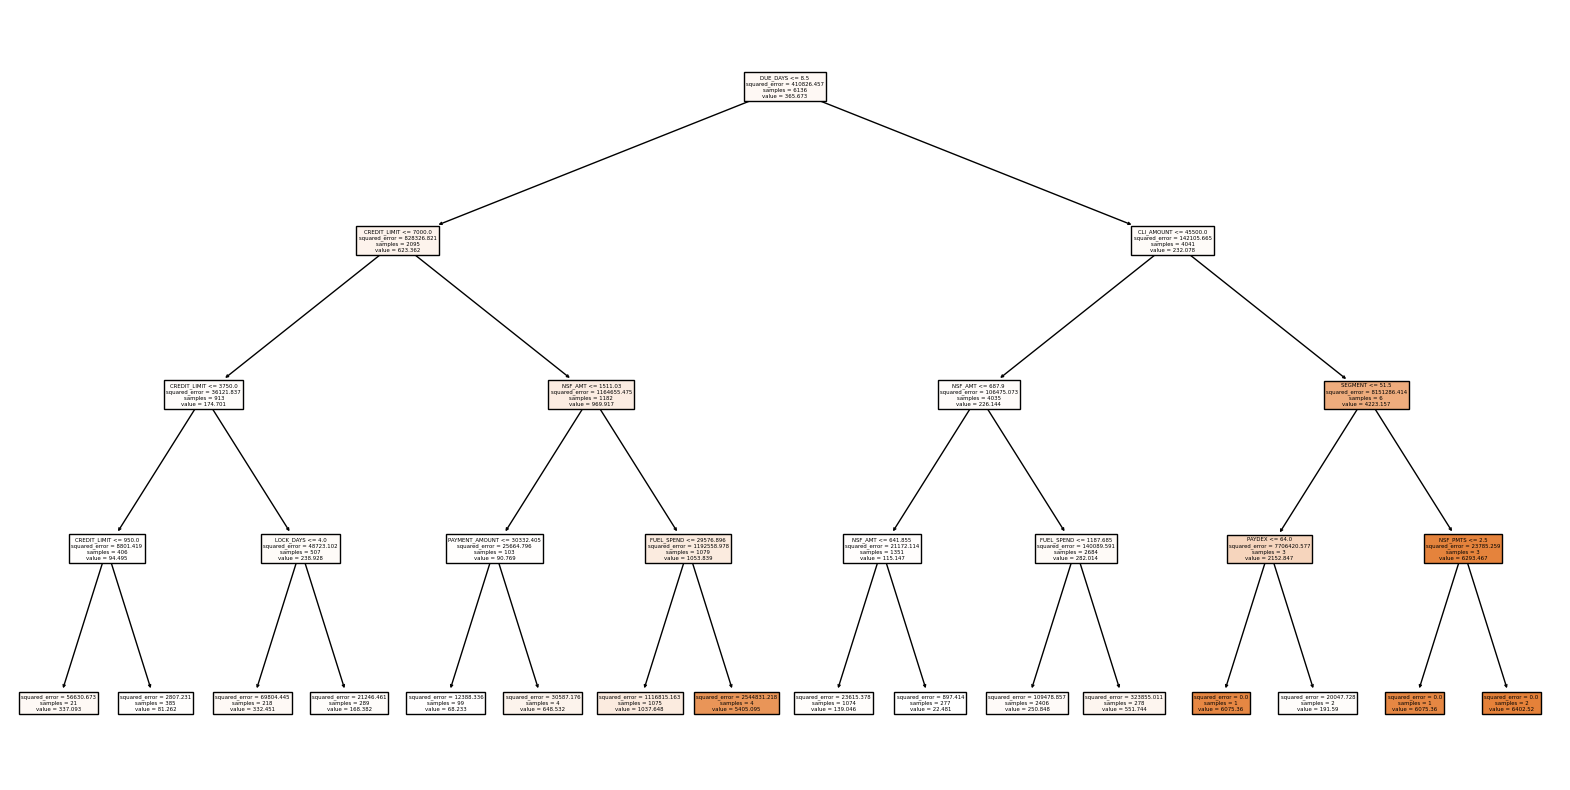

534.8824663569881

In [98]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
import matplotlib.pyplot as plt

# Fit a decision tree model
dt_model = DecisionTreeRegressor(max_depth=4, random_state=42)
dt_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_dt = dt_model.predict(X_test)
mse_dt = mean_squared_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mse_dt)

# Visualize the decision tree
plt.figure(figsize=(20,10))
plot_tree(dt_model, feature_names=predictors, filled=True)
plt.show()

rmse_dt


In [10]:
# 2nd analysis
predictors2 = ['VANTAGE_SCORE', 'CREDIT_LIMIT', 'NSF_PMTS', 'PAYDEX', 'CLI_AMOUNT', 'TOT_SPEND', 'FUEL_SPEND', 'PAYMENT_AMOUNT', 'BAL_1_30', 'BAL_31_60', 'BAL_61_90', 'BAL_90_PLUS', 'SEGMENT', 'CURRENT_BALANCE']


In [15]:
segment = 'SEGMENT'
target = 'TOT_NET_REV'
data2 = df.dropna(subset=predictors2 + [target])
X2 = data[predictors2]
y2 = data[target]

In [18]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=42)

In [19]:
lr_model = LinearRegression()
lr_model.fit(X_train2, y_train2)

LinearRegression()

In [21]:
y_pred2 = lr_model.predict(X_test2)
mse2 = mean_squared_error(y_test2, y_pred2)
rmse2 = np.sqrt(mse2)

In [22]:
coefficients2 = pd.Series(lr_model.coef_, index=predictors2)

rmse2, coefficients2

(519.0677460913411,
 VANTAGE_SCORE      0.311741
 CREDIT_LIMIT      -0.018264
 NSF_PMTS           2.888803
 PAYDEX             0.751104
 CLI_AMOUNT         0.014684
 TOT_SPEND          0.006110
 FUEL_SPEND         0.060853
 PAYMENT_AMOUNT     0.010299
 BAL_1_30          -0.001599
 BAL_31_60          0.013069
 BAL_61_90         -0.000533
 BAL_90_PLUS        0.005026
 SEGMENT            2.670500
 CURRENT_BALANCE    0.005915
 dtype: float64)

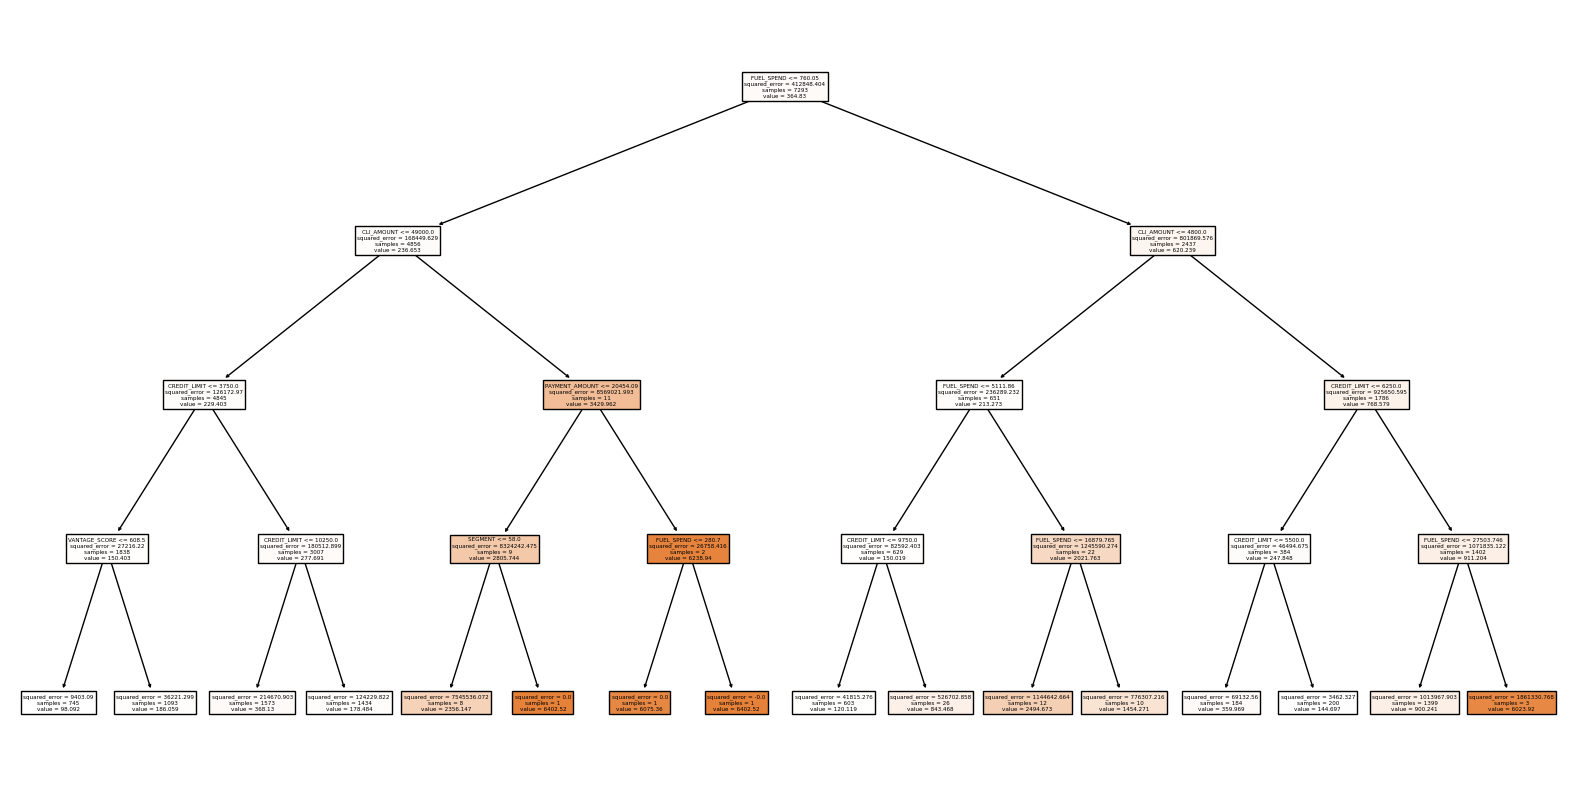

483.5360679795736

In [25]:
dt_model2 = DecisionTreeRegressor(max_depth=4, random_state=42)
dt_model2.fit(X_train2, y_train2)

# Predict and evaluate
y_pred_dt2 = dt_model2.predict(X_test2)
mse_dt2 = mean_squared_error(y_test2, y_pred_dt2)
rmse_dt2 = np.sqrt(mse_dt2)

# Visualize the decision tree
plt.figure(figsize=(20,10))
plot_tree(dt_model2, feature_names=predictors2, filled=True)
plt.show()

rmse_dt2

In [34]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
import matplotlib.pyplot as plt
from sklearn import tree

In [35]:
text_representation = tree.export_text(dt_model2)
print(text_representation)

|--- feature_6 <= 760.05
|   |--- feature_4 <= 49000.00
|   |   |--- feature_1 <= 3750.00
|   |   |   |--- feature_0 <= 608.50
|   |   |   |   |--- value: [98.09]
|   |   |   |--- feature_0 >  608.50
|   |   |   |   |--- value: [186.06]
|   |   |--- feature_1 >  3750.00
|   |   |   |--- feature_1 <= 10250.00
|   |   |   |   |--- value: [368.13]
|   |   |   |--- feature_1 >  10250.00
|   |   |   |   |--- value: [178.48]
|   |--- feature_4 >  49000.00
|   |   |--- feature_7 <= 20454.09
|   |   |   |--- feature_12 <= 58.00
|   |   |   |   |--- value: [2356.15]
|   |   |   |--- feature_12 >  58.00
|   |   |   |   |--- value: [6402.52]
|   |   |--- feature_7 >  20454.09
|   |   |   |--- feature_6 <= 280.70
|   |   |   |   |--- value: [6075.36]
|   |   |   |--- feature_6 >  280.70
|   |   |   |   |--- value: [6402.52]
|--- feature_6 >  760.05
|   |--- feature_4 <= 4800.00
|   |   |--- feature_6 <= 5111.86
|   |   |   |--- feature_1 <= 9750.00
|   |   |   |   |--- value: [120.12]
|   |   |   

In [36]:
# analysis target = segment

In [48]:
predictors3 = ['VANTAGE_SCORE', 'CREDIT_LIMIT', 'NSF_PMTS', 'PAYDEX', 'CLI_AMOUNT', 'TOT_SPEND', 'FUEL_SPEND', 'PAYMENT_AMOUNT', 'CURRENT_BALANCE']

In [49]:
segment = 'SEGMENT'
data3 = df.dropna(subset=predictors3 + [segment])
X3 = data[predictors3]
y3 = data[segment]

In [50]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.2, random_state=42)

In [51]:
lr_model3 = LinearRegression()
lr_model3.fit(X_train3, y_train3)

LinearRegression()

In [52]:
y_pred3 = lr_model3.predict(X_test3)
mse3 = mean_squared_error(y_test3, y_pred3)
rmse3 = np.sqrt(mse3)

In [53]:
coefficients3 = pd.Series(lr_model3.coef_, index=predictors3)

rmse3, coefficients3

(14.242725922639556,
 VANTAGE_SCORE     -0.010385
 CREDIT_LIMIT       0.000364
 NSF_PMTS           1.787821
 PAYDEX            -0.013955
 CLI_AMOUNT        -0.000369
 TOT_SPEND          0.000124
 FUEL_SPEND         0.000165
 PAYMENT_AMOUNT     0.000069
 CURRENT_BALANCE   -0.000085
 dtype: float64)

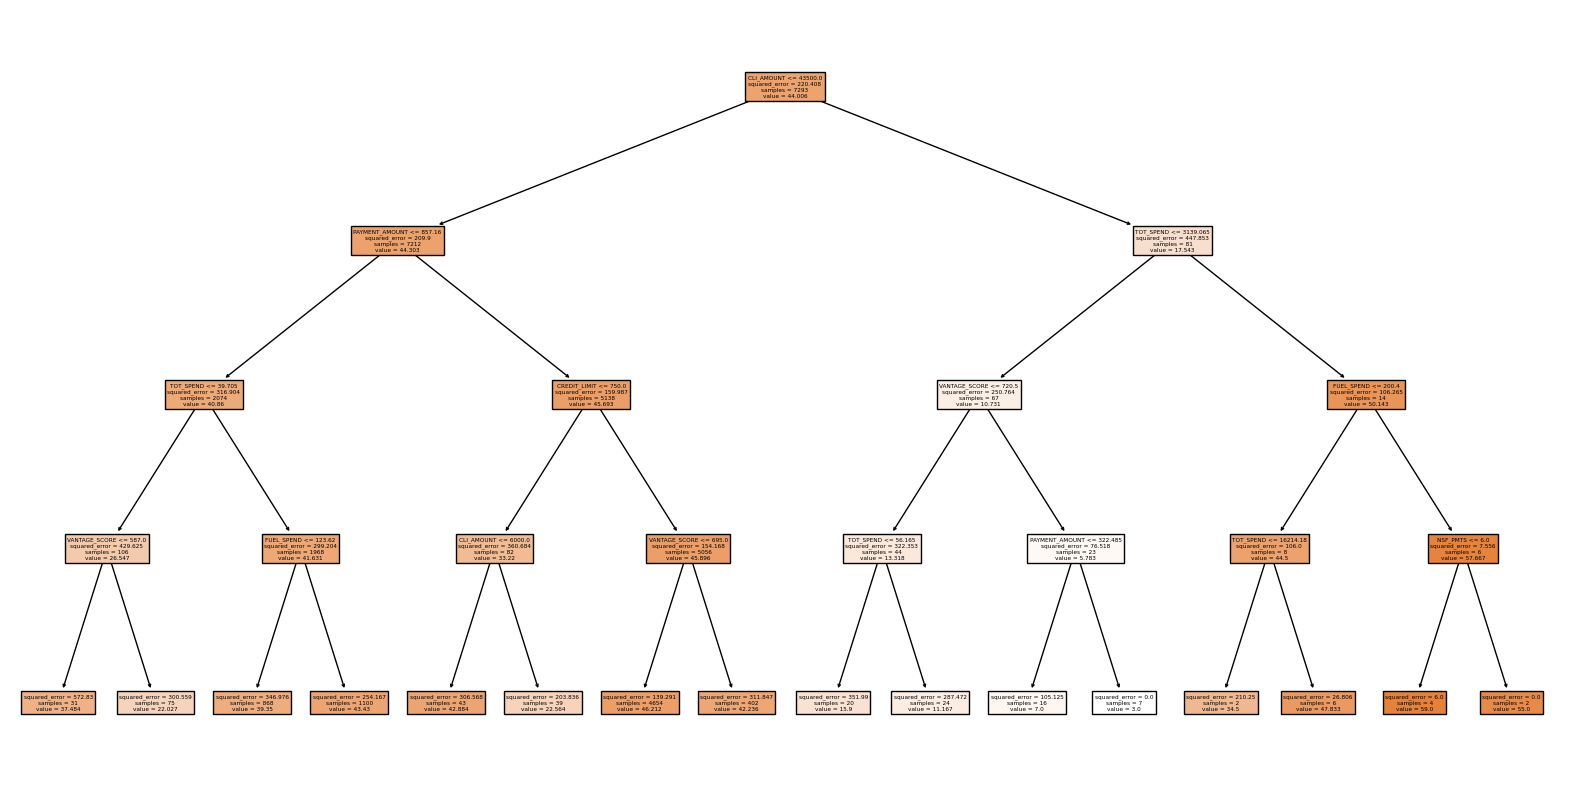

13.761702736594447

In [54]:
dt_model3 = DecisionTreeRegressor(max_depth=4, random_state=42)
dt_model3.fit(X_train3, y_train3)

# Predict and evaluate
y_pred_dt3 = dt_model3.predict(X_test3)
mse_dt3 = mean_squared_error(y_test3, y_pred_dt3)
rmse_dt3 = np.sqrt(mse_dt3)

# Visualize the decision tree
plt.figure(figsize=(20,10))
plot_tree(dt_model3, feature_names=predictors3, filled=True)
plt.show()

rmse_dt3

In [55]:
text_representation = tree.export_text(dt_model3)
print(text_representation)

|--- feature_4 <= 43500.00
|   |--- feature_7 <= 857.16
|   |   |--- feature_5 <= 39.70
|   |   |   |--- feature_0 <= 587.00
|   |   |   |   |--- value: [37.48]
|   |   |   |--- feature_0 >  587.00
|   |   |   |   |--- value: [22.03]
|   |   |--- feature_5 >  39.70
|   |   |   |--- feature_6 <= 123.62
|   |   |   |   |--- value: [39.35]
|   |   |   |--- feature_6 >  123.62
|   |   |   |   |--- value: [43.43]
|   |--- feature_7 >  857.16
|   |   |--- feature_1 <= 750.00
|   |   |   |--- feature_4 <= 6000.00
|   |   |   |   |--- value: [42.88]
|   |   |   |--- feature_4 >  6000.00
|   |   |   |   |--- value: [22.56]
|   |   |--- feature_1 >  750.00
|   |   |   |--- feature_0 <= 695.00
|   |   |   |   |--- value: [46.21]
|   |   |   |--- feature_0 >  695.00
|   |   |   |   |--- value: [42.24]
|--- feature_4 >  43500.00
|   |--- feature_5 <= 3139.06
|   |   |--- feature_0 <= 720.50
|   |   |   |--- feature_5 <= 56.17
|   |   |   |   |--- value: [15.90]
|   |   |   |--- feature_5 >  56.17
|